In [1]:
#Developed in PyCharm with Python 3
#Using Kali Linux
#Chinmaya Joshi

#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import os
import statistics as stats
import math
from scipy.signal import savgol_filter

In [2]:
#Defining function to load data
#Function uses directory names as arguments and outputs all the TRT data for the specified material, TIM application state, and test set/run

def loadRawData(file_name):

    # Load the text file and convert it to a DataFrame
    rawData = np.loadtxt(file_name, delimiter=',', skiprows=2, encoding='windows-1252')
    rawData = np.array(rawData)

    return rawData

In [34]:
hallFxNoInputTestData = loadRawData("NoInput.txt")
hallFxNMagnetTestData = loadRawData("UsingNMagnet.txt")
hallFxSMagnetTestData = loadRawData("UsingSMagnet.txt")
photoresistorTestData = loadRawData("photoresisotr.txt")

#Filtered Values
filteredHallFxNoInputTestData = savgol_filter(np.transpose(hallFxNoInputTestData), 200, 1)
filteredHallFxNMagnetTestData = savgol_filter(np.transpose(hallFxNMagnetTestData), 50, 1)
filteredHallFxSMagnetTestData = savgol_filter(np.transpose(hallFxSMagnetTestData), 50, 1)
filteredPhotoresistorTestData = savgol_filter(np.transpose(photoresistorTestData), 50, 1)

#print(photoresistorTestData)


hallFxNoInputTimes = np.arange(0,(len(hallFxNoInputTestData)*0.01), 0.01)
hallFxNMagnetTestTimes = np.arange(0,(len(hallFxNMagnetTestData)*0.01), 0.01)
hallFxSMagnetTestTimes = np.arange(0,(len(hallFxSMagnetTestData)*0.01), 0.01)
photoresistorTestTimes = np.arange(0, (len(photoresistorTestData)*5), 5)
photoresistorTestTimesHours = np.arange(0+1, 1+(len(photoresistorTestData)*5)/3600, 5/3600)


print(len(hallFxNoInputTestData))
print(len(hallFxNMagnetTestData))
print(len(hallFxSMagnetTestData))
print(len(photoresistorTestData))
print("-------------------------")
print(len(hallFxNoInputTimes))
print(len(hallFxNMagnetTestTimes))
print(len(hallFxSMagnetTestTimes))
print(len(photoresistorTestTimes))
print("-------------------------")
print(hallFxNoInputTestData[:,0])
print(filteredHallFxNoInputTestData[0])

1082
2082
1513
5028
-------------------------
1082
2082
1513
5028
-------------------------
[257. 255. 257. ... 257. 261. 259.]
[256.25358209 256.26460137 256.27562064 ... 257.61699917 257.6140966
 257.61119403]


In [35]:
baselineAverageHallFxA = np.mean(hallFxNoInputTestData[:,0])
baselineAverageHallFxB = np.mean(hallFxNoInputTestData[:,1])
baselineAverageHallFxC = np.mean(hallFxNoInputTestData[:,2])
baselineAverageHallFxD = np.mean(hallFxNoInputTestData[:,3])

print(baselineAverageHallFxA)
print(baselineAverageHallFxB)
print(baselineAverageHallFxC)
print(baselineAverageHallFxD)

257.82809611829947
261.48428835489835
257.6903881700554
261.66913123844733


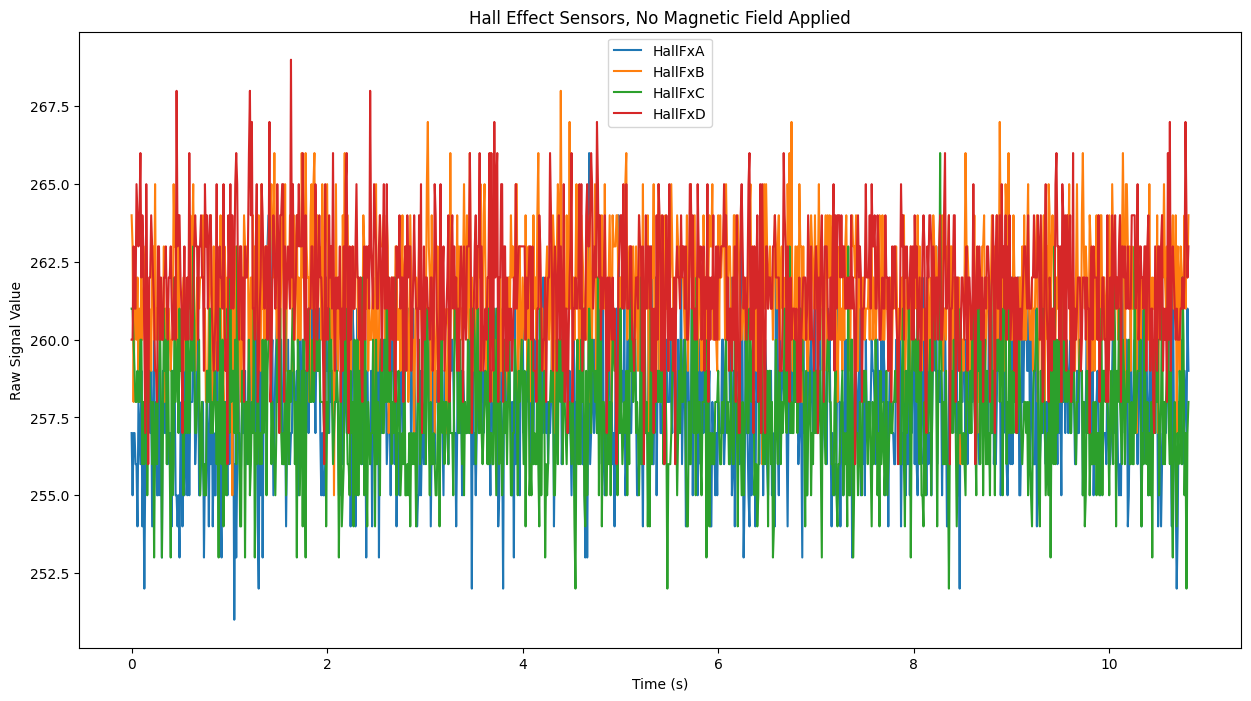

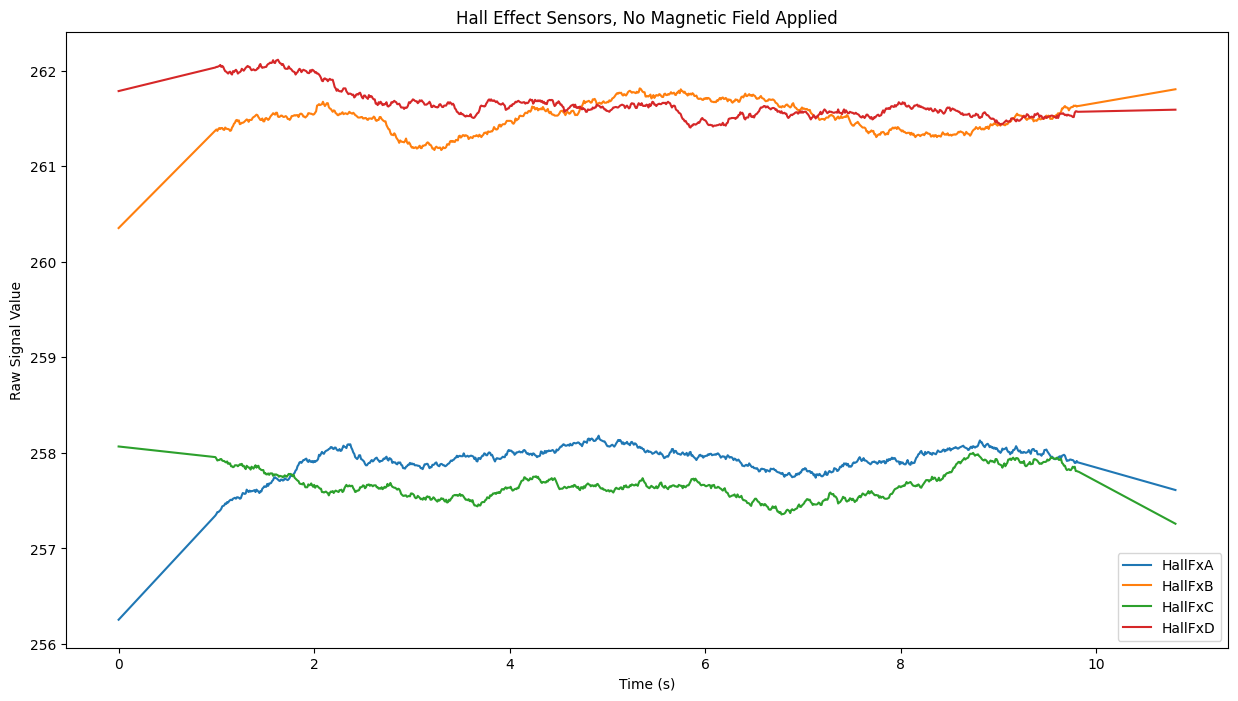

In [36]:
plt.figure(1, figsize=(15,8))
plt.plot(hallFxNoInputTimes, hallFxNoInputTestData[:,0], label="HallFxA")
plt.plot(hallFxNoInputTimes, hallFxNoInputTestData[:,1], label="HallFxB")
plt.plot(hallFxNoInputTimes, hallFxNoInputTestData[:,2], label="HallFxC")
plt.plot(hallFxNoInputTimes, hallFxNoInputTestData[:,3], label="HallFxD")
plt.legend()
plt.title("Hall Effect Sensors, No Magnetic Field Applied")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (s)")
plt.show()

plt.figure(2, figsize=(15,8))
plt.plot(hallFxNoInputTimes, filteredHallFxNoInputTestData[0], label="HallFxA")
plt.plot(hallFxNoInputTimes, filteredHallFxNoInputTestData[1], label="HallFxB")
plt.plot(hallFxNoInputTimes, filteredHallFxNoInputTestData[2], label="HallFxC")
plt.plot(hallFxNoInputTimes, filteredHallFxNoInputTestData[3], label="HallFxD")
plt.legend()
plt.title("Hall Effect Sensors, No Magnetic Field Applied")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (s)")
plt.show()








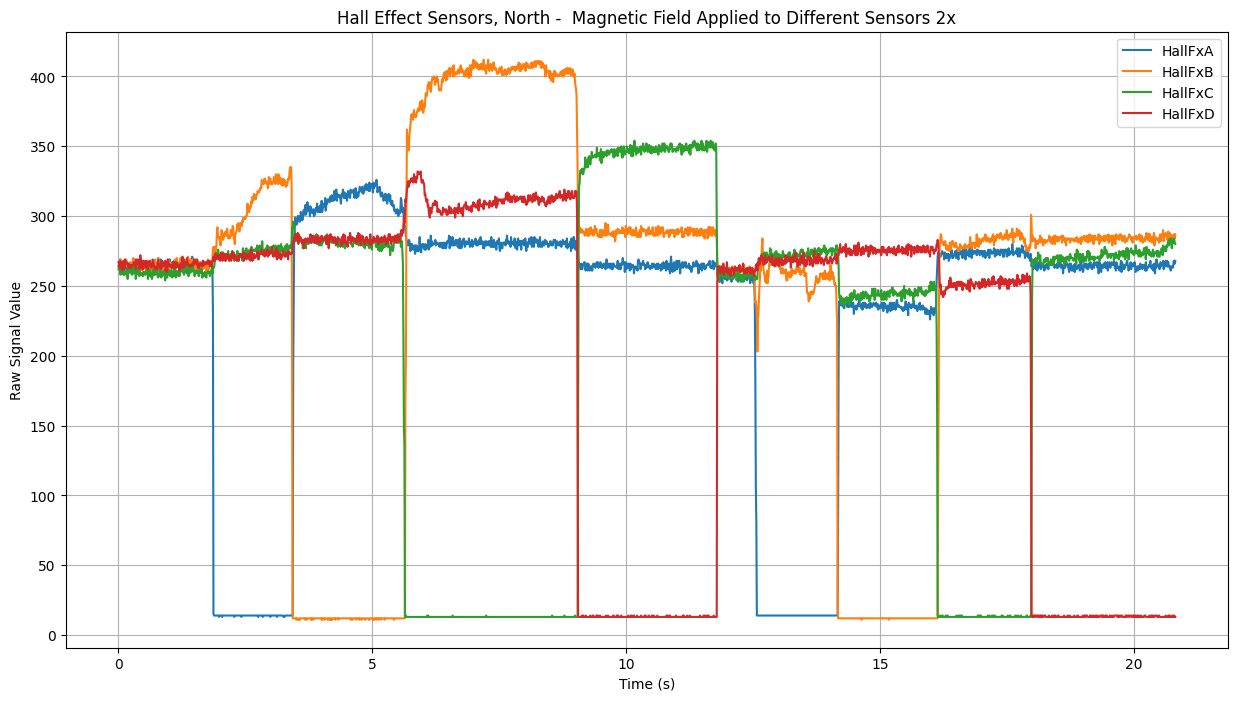

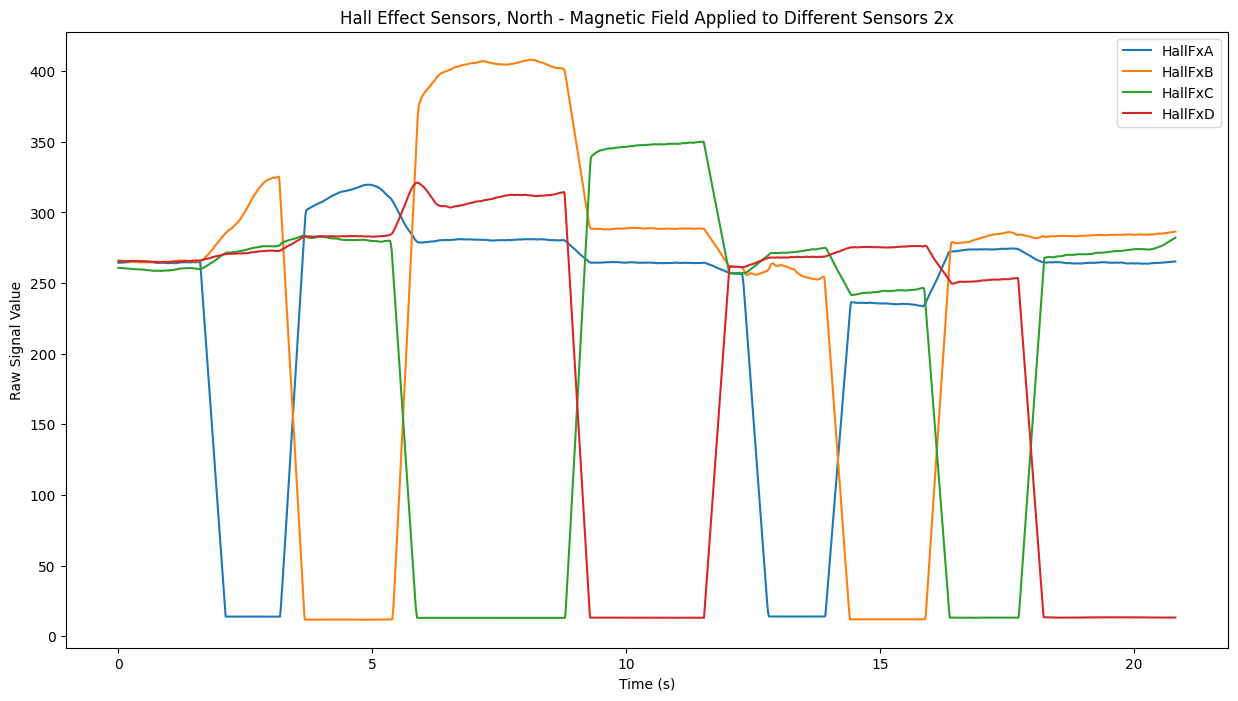

In [21]:
plt.figure(3, figsize=(15,8))
plt.plot(hallFxNMagnetTestTimes, hallFxNMagnetTestData[:,0], label="HallFxA")
plt.plot(hallFxNMagnetTestTimes, hallFxNMagnetTestData[:,1], label="HallFxB")
plt.plot(hallFxNMagnetTestTimes, hallFxNMagnetTestData[:,2], label="HallFxC")
plt.plot(hallFxNMagnetTestTimes, hallFxNMagnetTestData[:,3], label="HallFxD")
plt.legend()
plt.title("Hall Effect Sensors, North -  Magnetic Field Applied to Different Sensors 2x")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (s)")
plt.grid(True)
plt.show()

plt.figure(4, figsize=(15,8))
plt.plot(hallFxNMagnetTestTimes, filteredHallFxNMagnetTestData[0], label="HallFxA")
plt.plot(hallFxNMagnetTestTimes, filteredHallFxNMagnetTestData[1], label="HallFxB")
plt.plot(hallFxNMagnetTestTimes, filteredHallFxNMagnetTestData[2], label="HallFxC")
plt.plot(hallFxNMagnetTestTimes, filteredHallFxNMagnetTestData[3], label="HallFxD")
plt.legend()
plt.title("Hall Effect Sensors, North - Magnetic Field Applied to Different Sensors 2x")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (s)")
plt.show()



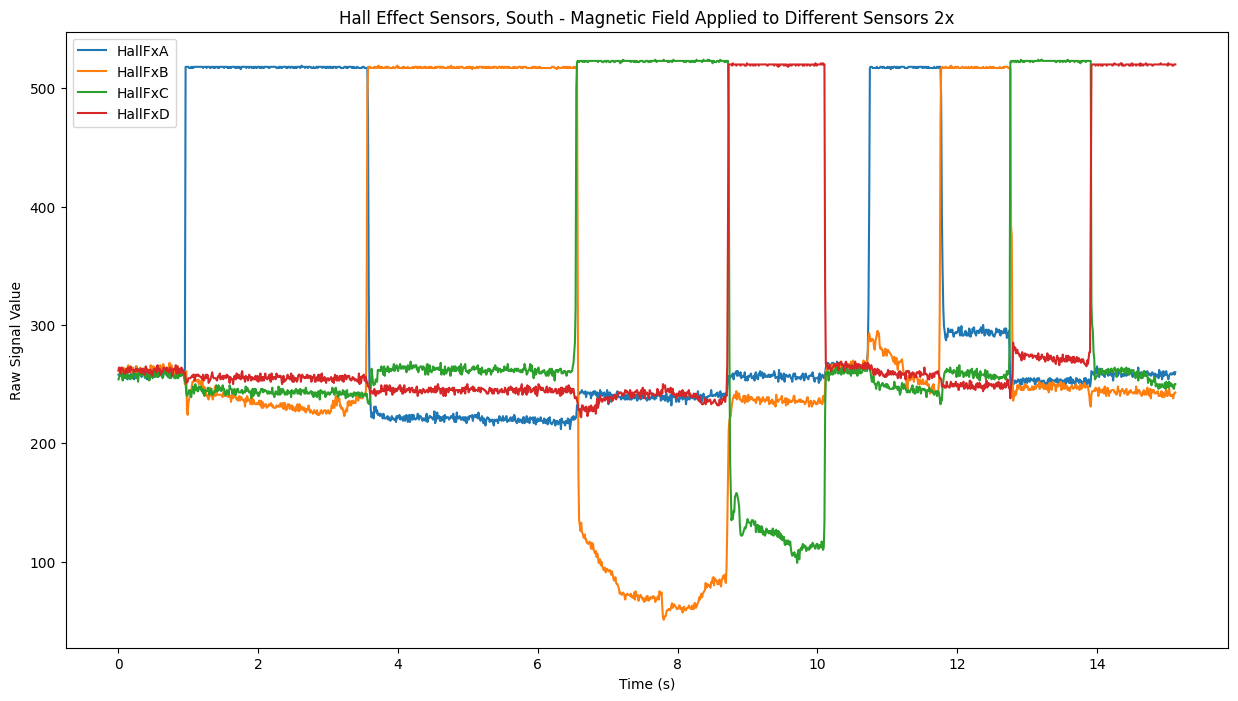

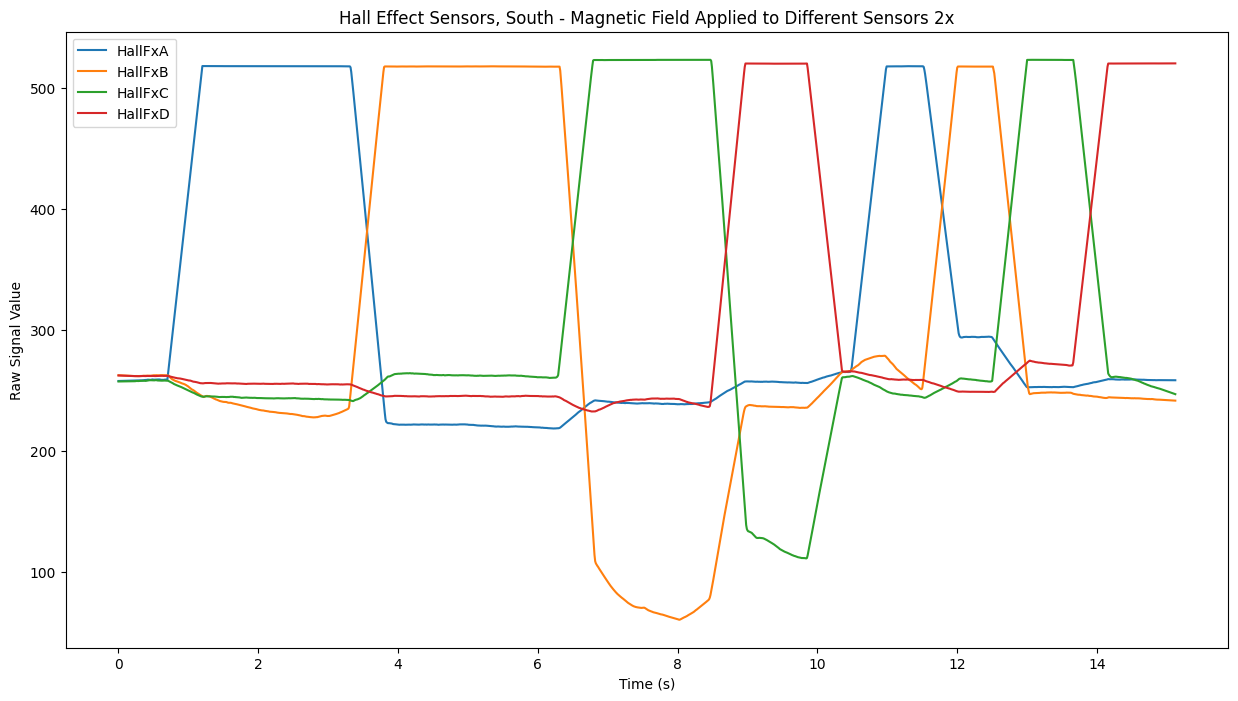

In [7]:
plt.figure(5, figsize=(15,8))
plt.plot(hallFxSMagnetTestTimes, hallFxSMagnetTestData[:,0], label="HallFxA")
plt.plot(hallFxSMagnetTestTimes, hallFxSMagnetTestData[:,1], label="HallFxB")
plt.plot(hallFxSMagnetTestTimes, hallFxSMagnetTestData[:,2], label="HallFxC")
plt.plot(hallFxSMagnetTestTimes, hallFxSMagnetTestData[:,3], label="HallFxD")
plt.legend()
plt.title("Hall Effect Sensors, South - Magnetic Field Applied to Different Sensors 2x")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (s)")
plt.show()

plt.figure(6, figsize=(15,8))
plt.plot(hallFxSMagnetTestTimes, filteredHallFxSMagnetTestData[0], label="HallFxA")
plt.plot(hallFxSMagnetTestTimes, filteredHallFxSMagnetTestData[1], label="HallFxB")
plt.plot(hallFxSMagnetTestTimes, filteredHallFxSMagnetTestData[2], label="HallFxC")
plt.plot(hallFxSMagnetTestTimes, filteredHallFxSMagnetTestData[3], label="HallFxD")
plt.legend()
plt.title("Hall Effect Sensors, South - Magnetic Field Applied to Different Sensors 2x")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (s)")
plt.show()



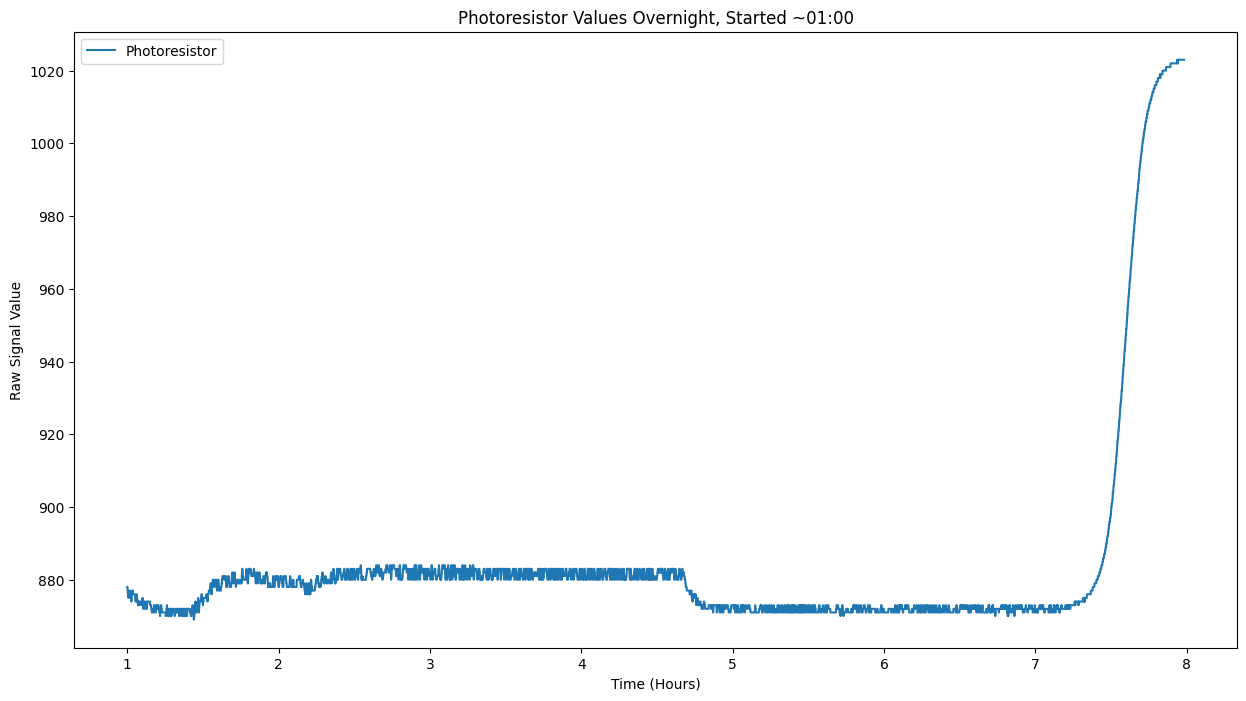

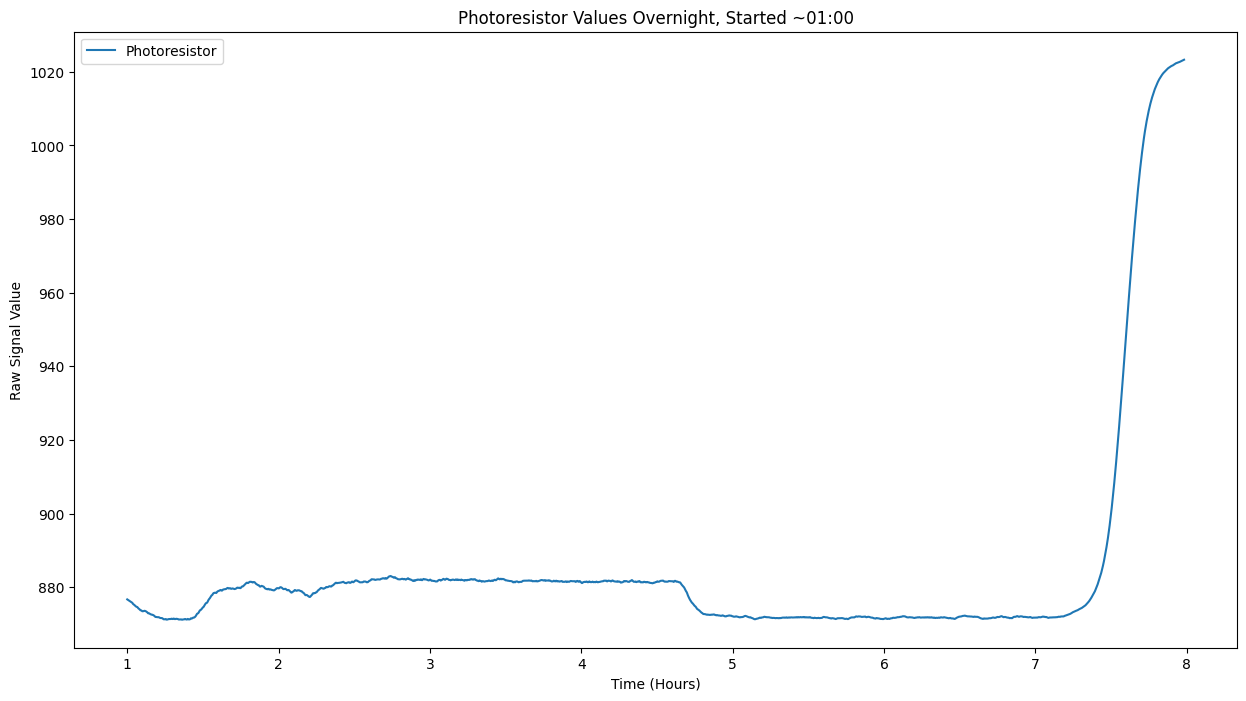

In [8]:
plt.figure(7, figsize=(15,8))
plt.plot(photoresistorTestTimesHours, photoresistorTestData[:], label="Photoresistor")
plt.legend()
plt.title("Photoresistor Values Overnight, Started ~01:00")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (Hours)")
plt.show()

plt.figure(8, figsize=(15,8))
plt.plot(photoresistorTestTimesHours, filteredPhotoresistorTestData[:], label="Photoresistor")
plt.legend()
plt.title("Photoresistor Values Overnight, Started ~01:00")
plt.ylabel("Raw Signal Value")
plt.xlabel("Time (Hours)")
plt.show()
